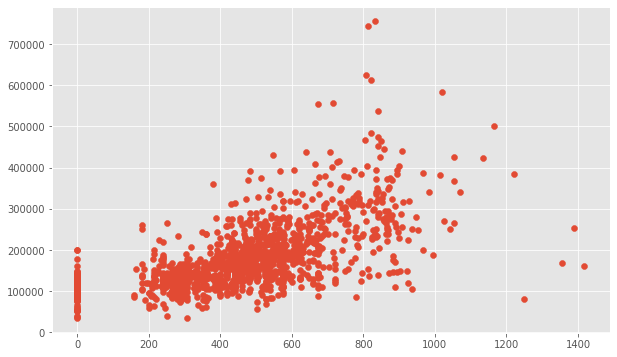

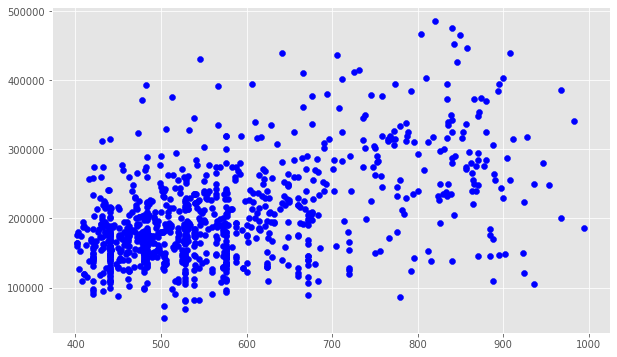

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1

data_frame = pd.read_csv('./train.csv')
# print(data_frame['GarageArea'])
# print(data_frame['SalePrice'])
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
plt.scatter(data_frame['GarageArea'],data_frame['SalePrice'])
plt.show()

filter_data = data_frame[(data_frame['GarageArea'] < 1000) & (data_frame['SalePrice'] < 500000) & (data_frame['GarageArea'] > 400)]
plt1.scatter(filter_data['GarageArea'],filter_data['SalePrice'],color='b')
plt1.show()

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

wine_df = pd.read_csv('./winequality-red.csv')
numeric_features  = wine_df.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print(corr['quality'].sort_values(ascending=False)[:3],'\n')

#delete null values
nulls = pd.DataFrame(wine_df.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)
print("\n")

##handling missing value
data = wine_df.select_dtypes(include=[np.number]).interpolate().dropna()
print("missing values: " + str(sum(data.isnull().sum() != 0))+ "\n")

##building model
y = np.log(wine_df.quality)
X = data.drop(['quality'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=0.4)
l_model = linear_model.LinearRegression()
model = l_model.fit(X_train, y_train)
print ("R2 score: ", model.score(X_test, y_test))


prdc = model.predict(X_test)
print ('RMSE score: ', mean_squared_error(y_test, prdc))

quality      1.000000
alcohol      0.476166
sulphates    0.251397
Name: quality, dtype: float64 

                      Null Count
Feature                         
quality                        0
alcohol                        0
sulphates                      0
pH                             0
density                        0
total sulfur dioxide           0
free sulfur dioxide            0
chlorides                      0
residual sugar                 0
citric acid                    0
volatile acidity               0
fixed acidity                  0


missing values: 0

R2 score:  0.3219441741294884
RMSE score:  0.013959004895965155
